# Multi-Linear Regression - Sales Prediction through Advertising

To predict amount of sales based on the various of advertisements

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import metrics

### 1. Data Analysis

In [21]:
# load data from csv file
df = pd.read_csv('ads-sales.csv')

df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [22]:
# show summary information of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [23]:
# show statistics information of dataframe
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [24]:
# compute correlation coefficent between variables
correlation_matrix = df.corr()
print(correlation_matrix)

                 TV     radio  newspaper     sales
TV         1.000000  0.054809   0.056648  0.782224
radio      0.054809  1.000000   0.354104  0.576223
newspaper  0.056648  0.354104   1.000000  0.228299
sales      0.782224  0.576223   0.228299  1.000000


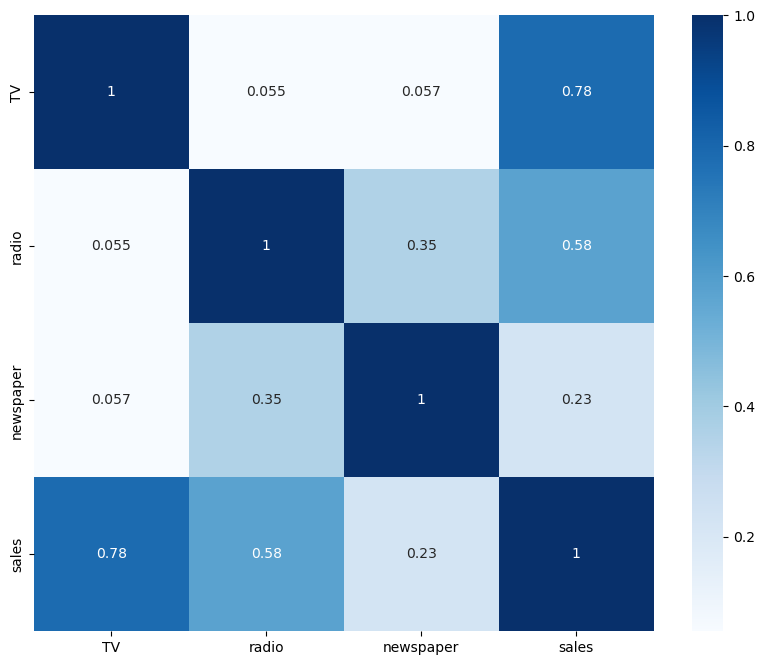

In [25]:
# plot correlation coefficent using heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')
plt.show()

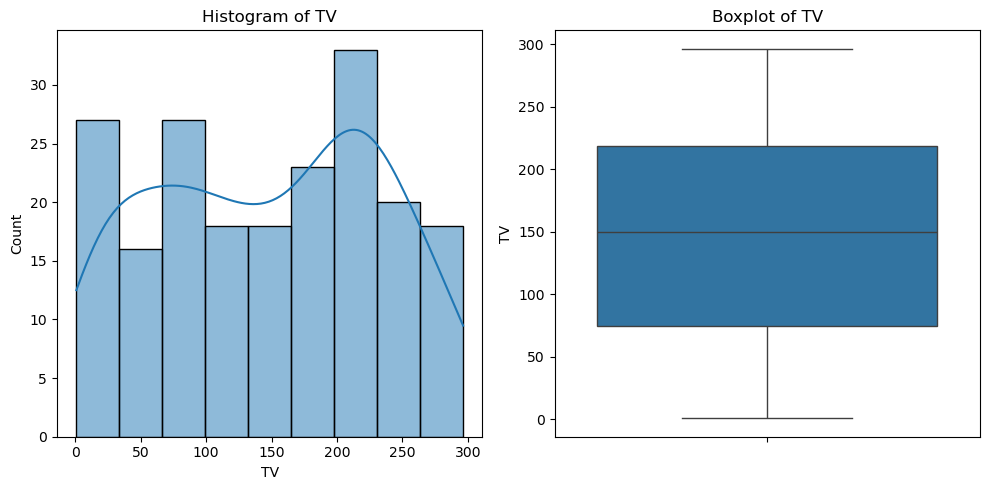

In [26]:
# show histogram and boxplot of variable TV
tv_data = df['TV']

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

sns.histplot(data=tv_data, ax=axs[0], kde=True)
axs[0].set_title('Histogram of TV')

sns.boxplot(data=tv_data, ax=axs[1])
axs[1].set_title('Boxplot of TV')

plt.tight_layout()
plt.show()

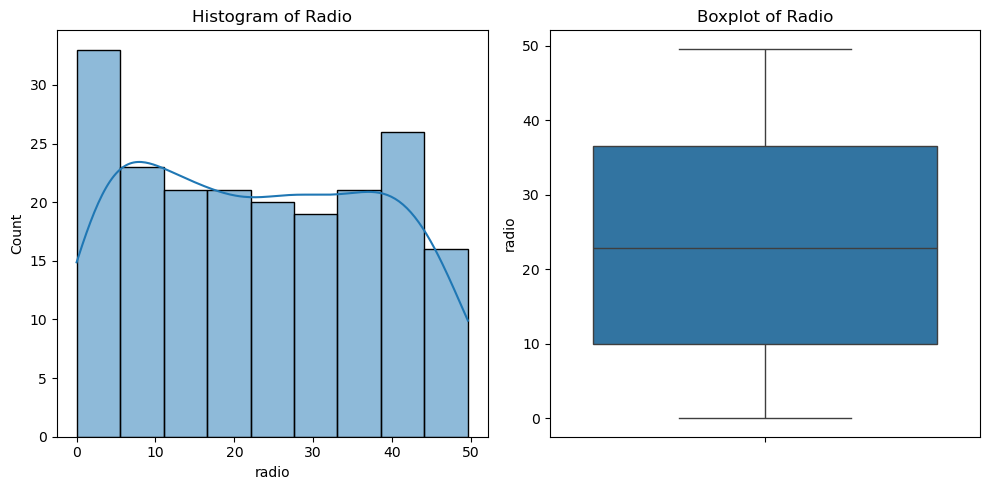

In [27]:
# show histogram and boxplot of variable Radio
tv_data = df['radio']

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

sns.histplot(data=tv_data, ax=axs[0], kde=True)
axs[0].set_title('Histogram of Radio')

sns.boxplot(data=tv_data, ax=axs[1])
axs[1].set_title('Boxplot of Radio')

plt.tight_layout()
plt.show()


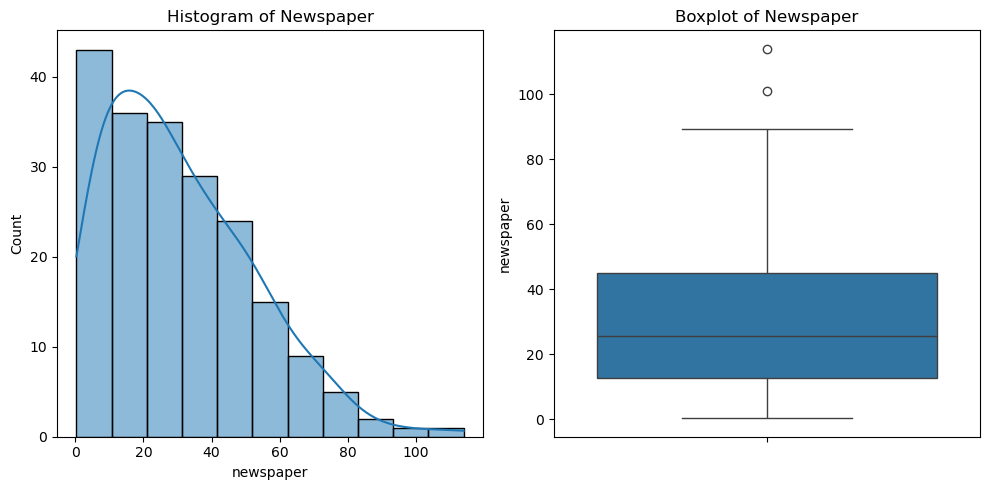

In [28]:
# show histogram and boxplot of variable Newspaper
tv_data = df['newspaper']

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

sns.histplot(data=tv_data, ax=axs[0], kde=True)
axs[0].set_title('Histogram of Newspaper')

sns.boxplot(data=tv_data, ax=axs[1])
axs[1].set_title('Boxplot of Newspaper')

plt.tight_layout()
plt.show()

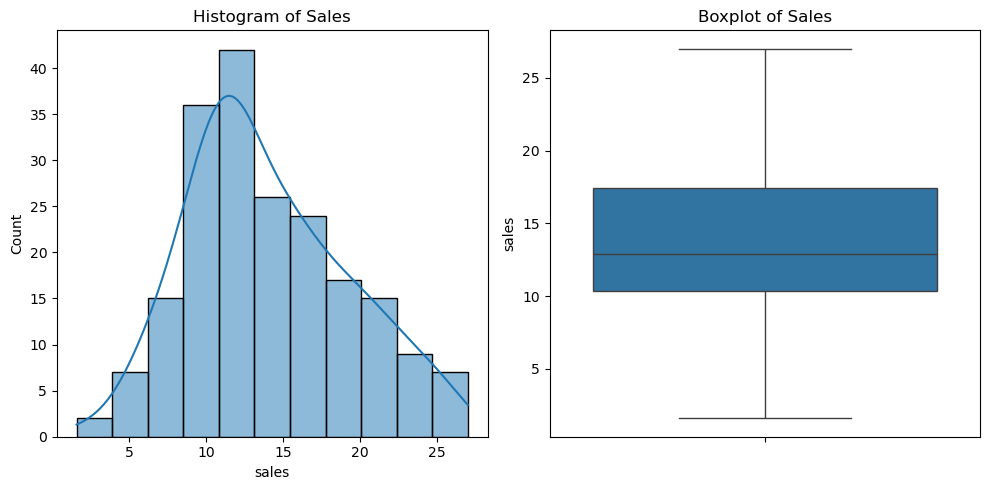

In [29]:
# show histogram and boxplot of variable Sales
tv_data = df['sales']

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

sns.histplot(data=tv_data, ax=axs[0], kde=True)
axs[0].set_title('Histogram of Sales')

sns.boxplot(data=tv_data, ax=axs[1])
axs[1].set_title('Boxplot of Sales')

plt.tight_layout()
plt.show()

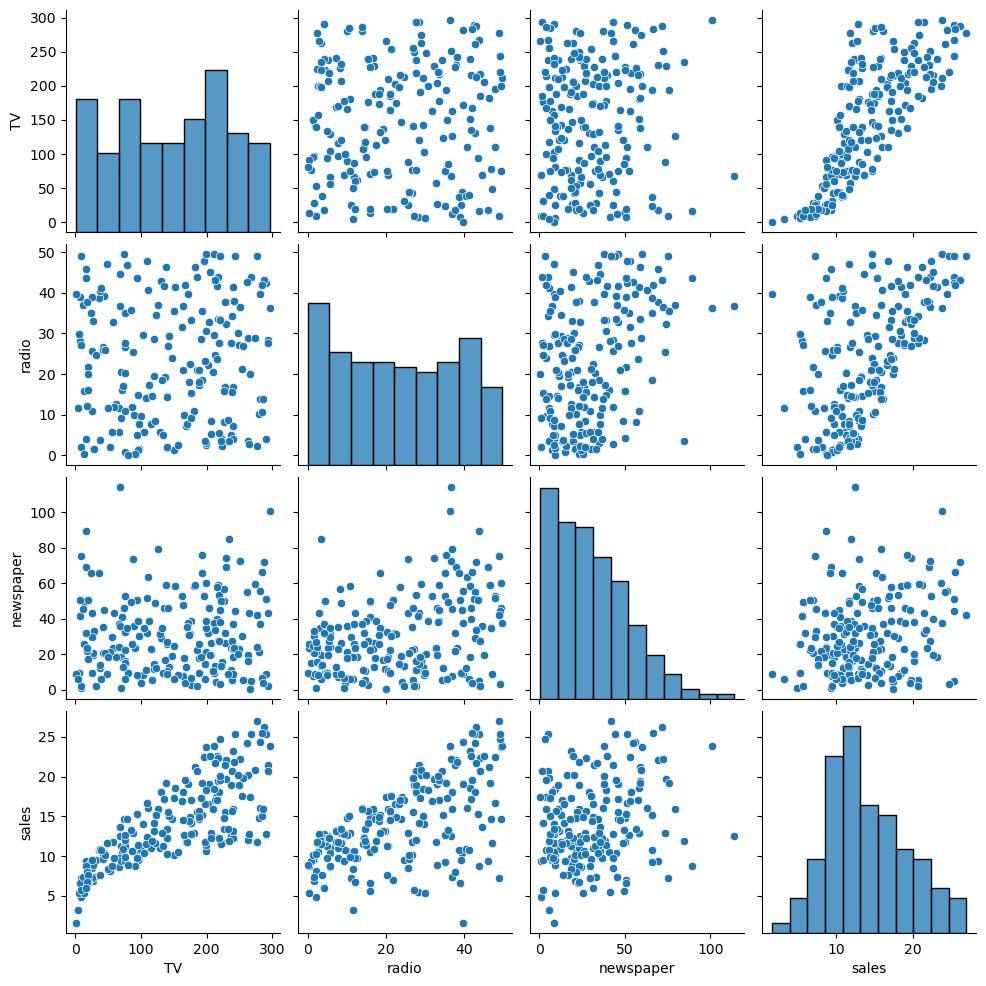

In [30]:
# plot scatter matrix between variables
# https://seaborn.pydata.org/generated/seaborn.pairplot.html
#question: which variable(s) has a strong relationship with sale?
sns.pairplot(df)
plt.show()


##### Thus, based on the scatter plots:

- **TV** has a strong positive relationship with sales.
- **Radio** and **newspaper** do not have a strong relationship with sales.

### 2. Training

In [31]:
# prepare input and output data
X = df[['TV', 'radio', 'newspaper']]
y = df['sales']

# split data into train and test set with 20% as test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# train model
model = LinearRegression()
model.fit(X_train, y_train)


# get learned parameters
weights = model.coef_
bias = model.intercept_

print('We obtained the model parameters as follows:')
print('Weights: ', weights)
print('Bias: ', bias)

We obtained the model parameters as follows:
Weights:  [ 0.04458402  0.19649703 -0.00278146]
Bias:  2.9948930304953283


### 3. Evaluation

In [32]:
# Make prediction with test set
y_pred = model.predict(X_test)

# Calculate evaluation measures
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean squared error: ', mse)
print('Mean absolute error: ', mae)
print('R2 score: ', r2)

Mean squared error:  4.4021182914496935
Mean absolute error:  1.3617813502090288
R2 score:  0.8601145185017866


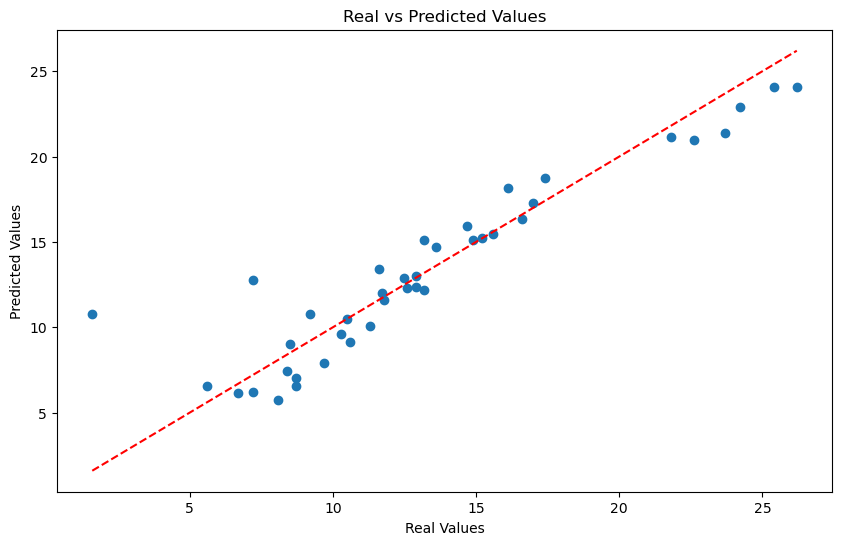

In [33]:
# visualize the predicted value with real value
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.title('Real vs Predicted Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.show()

In [34]:
# show predicted and real sales
sales_df = pd.DataFrame({'Real Sales': y_test, 'Predicted Sales': y_pred})

print(sales_df)

     Real Sales  Predicted Sales
18         11.3        10.057396
170         8.4         7.452281
107         8.7         7.019708
98         25.4        24.080297
177        11.7        12.017863
182         8.7         6.537939
5           7.2        12.782869
146        13.2        15.109746
12          9.2        10.769740
152        16.6        16.343580
61         24.2        22.882975
125        10.6         9.129245
180        10.5        10.464557
154        15.6        15.487436
80         11.8        11.585556
7          13.2        12.172969
33         17.4        18.765515
130         1.6        10.783186
37         14.7        15.905160
74         17.0        17.306513
183        26.2        24.066921
145        10.3         9.598342
45         14.9        15.135122
159        12.9        12.385915
60          8.1         5.713609
123        15.2        15.247493
179        12.6        12.294023
185        22.6        20.942117
122        11.6        13.409916
44        